In [1]:
import os
import requests
import pandas as pd
from env import user, password, host

from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
def wrangle_store_data():
    '''
    Checks for a local cache of tsa_store_data.csv and if not present will run the get_store_data() function which acquires data from Codeup's mysql server
    '''
    filename = 'tsa_store_data.csv'
    
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    else:
        df = get_store_data()
        
    return df

In [3]:
df = wrangle_store_data()

In [4]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


### SUMMARIZE

In [5]:
df.shape # number of rows and columns

(913000, 14)

In [6]:
df.isnull().sum() # number null values in each column

store_id         0
item_id          0
item_upc14       0
item_upc12       0
item_brand       0
item_name        0
item_price       0
sale_id          0
sale_date        0
sale_amount      0
store_address    0
store_zipcode    0
store_city       0
store_state      0
dtype: int64

In [7]:
df.store_id.unique() # unique values of  store_id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
df.item_id.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [9]:
df.sale_date.nunique() # number of unique sales dates


1826

In [10]:
df.sale_date.nunique() / 365

5.002739726027397

In [11]:
df.sale_date.min(), df.sale_date.max()


('2013-01-01', '2017-12-31')

In [12]:
df.sale_amount.describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sale_amount, dtype: float64

### PREPARE

#### Set Datetime Index-Convert date column to datetime format.
#### Set the index to be the datetime variable.

In [13]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

# Set the index as that date and then sort index (by the date)
df = df.set_index("sale_date").sort_index()


In [14]:
df.tail()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,7,28,719175900007,719175900007,Usda Produce,Guava,7.52,505802,59,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,913000,82,8503 NW Military Hwy,78231,San Antonio,TX


In [15]:
df.shape[0], df.sale_id.nunique()


(913000, 913000)

Column: store_id


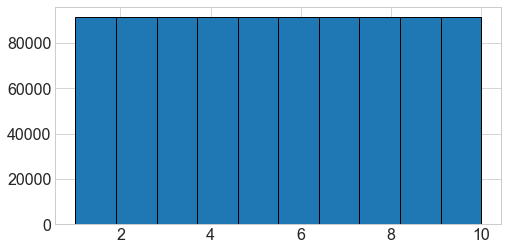

Column: item_id


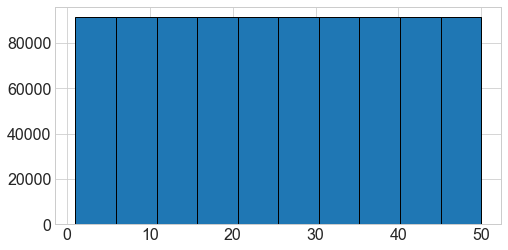

Column: item_upc14


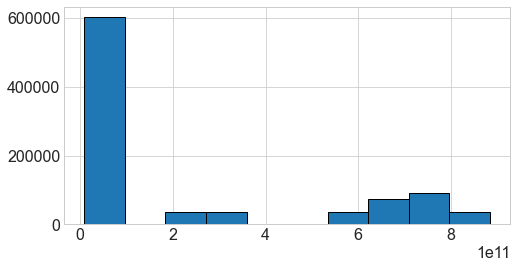

Column: item_upc12


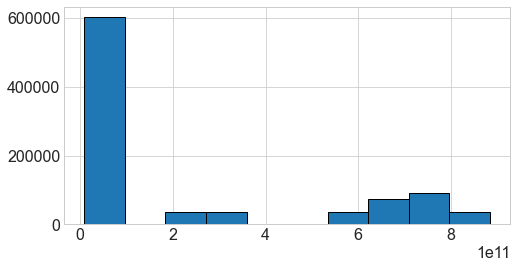

Column: item_brand


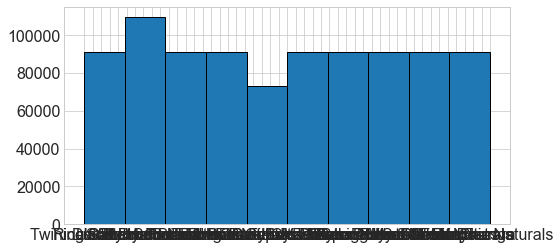

Column: item_name


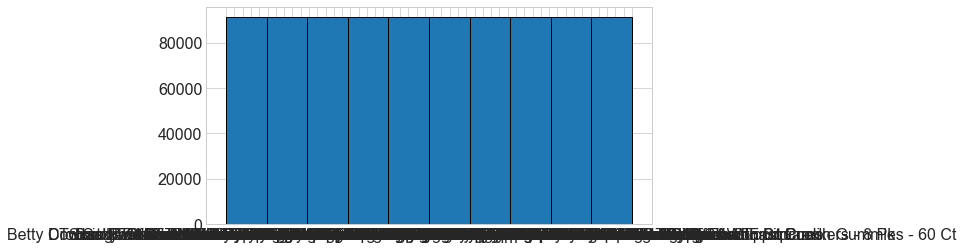

Column: item_price


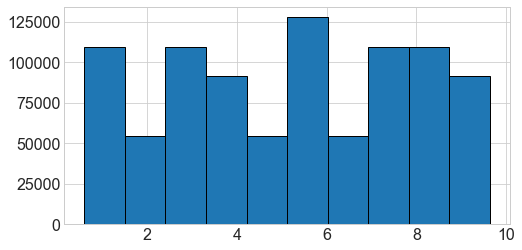

Column: sale_id


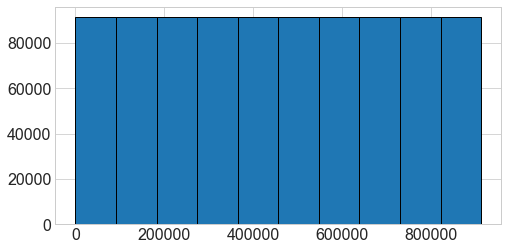

Column: sale_amount


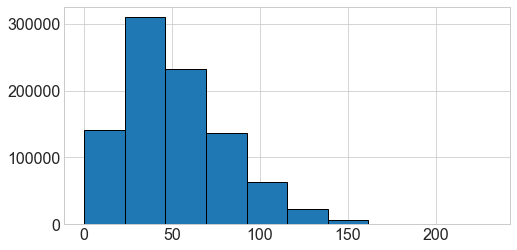

Column: store_address


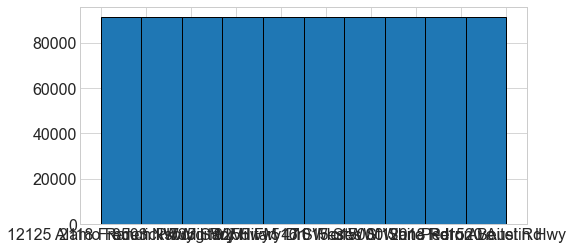

Column: store_zipcode


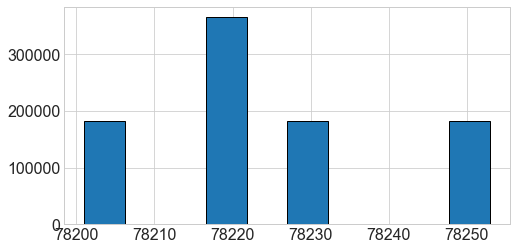

Column: store_city


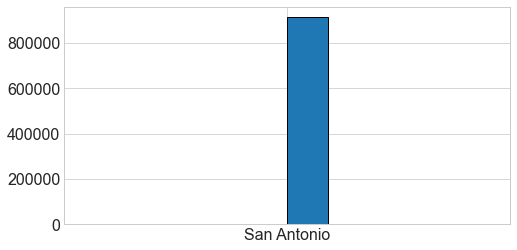

Column: store_state


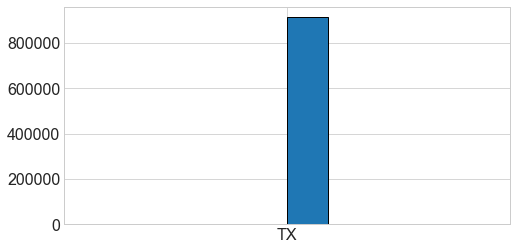

In [16]:
# Univariate analysis of variable distributions
for col in df.columns:
    print('Column: ' + col)
    plt.figure(figsize=(8,4))
    plt.hist(df[col], edgecolor='black')
    plt.show()

### Plot the distribution of sale_amount and item_price.

In [17]:
by_date = df.groupby(['sale_date']).sale_amount.sum().reset_index()
by_date.head()


,sale_date,sale_amount
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237


<AxesSubplot:xlabel='sale_date'>

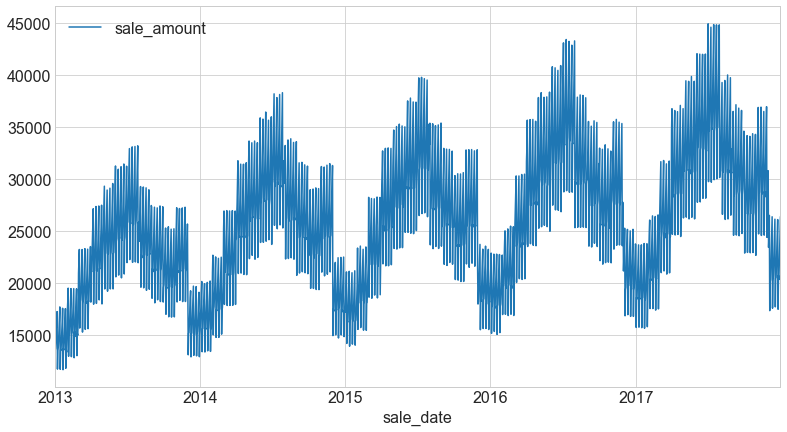

In [18]:
by_date.plot(x='sale_date', y='sale_amount')


In [19]:
# Number of observations per store = number of item-transactions per store.
df.store_id.value_counts()


1     91300
3     91300
10    91300
9     91300
2     91300
4     91300
6     91300
8     91300
7     91300
5     91300
Name: store_id, dtype: int64

In [20]:
df.item_id.value_counts().sort_index()


1     18260
2     18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
24    18260
25    18260
26    18260
27    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
38    18260
39    18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
50    18260
Name: item_id, dtype: int64

In [21]:
first_sale = df.reset_index().groupby(['store_id','item_id']).sale_date.min()
first_sale.head(100)

store_id  item_id
1         1         2013-01-01
          2         2013-01-01
          3         2013-01-01
          4         2013-01-01
          5         2013-01-01
                       ...    
2         46        2013-01-01
          47        2013-01-01
          48        2013-01-01
          49        2013-01-01
          50        2013-01-01
Name: sale_date, Length: 100, dtype: datetime64[ns]

In [22]:
# get the unique dates from first_sale_per_storeitem
first_sale.unique() # if there's only one unique value, then YES!


array(['2013-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [23]:
last_sale = df.reset_index().groupby(['store_id','item_id']).sale_date.max()
last_sale.head(50)


store_id  item_id
1         1         2017-12-31
          2         2017-12-31
          3         2017-12-31
          4         2017-12-31
          5         2017-12-31
          6         2017-12-31
          7         2017-12-31
          8         2017-12-31
          9         2017-12-31
          10        2017-12-31
          11        2017-12-31
          12        2017-12-31
          13        2017-12-31
          14        2017-12-31
          15        2017-12-31
          16        2017-12-31
          17        2017-12-31
          18        2017-12-31
          19        2017-12-31
          20        2017-12-31
          21        2017-12-31
          22        2017-12-31
          23        2017-12-31
          24        2017-12-31
          25        2017-12-31
          26        2017-12-31
          27        2017-12-31
          28        2017-12-31
          29        2017-12-31
          30        2017-12-31
          31        2017-12-31
          32        2

In [24]:
last_sale.unique() # if there's only one unique value, then YES!


array(['2017-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [25]:
days_per_store_per_item = df.reset_index().groupby(['store_id','item_id']).sale_date.nunique()
days_per_store_per_item.head()

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
Name: sale_date, dtype: int64

In [26]:
# If there's only one unique value in the list, then YES!
days_per_store_per_item.unique() 


array([1826])

#### Add a 'month' and 'day of week' column to your dataframe.

In [27]:
df['month'] = df.index.month

In [28]:
df['day_of_week'] = df.index.day_name()

In [29]:
df['sales_total'] =  df['sale_amount'] * df['item_price']

In [30]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,25.16


### Check for time gaps

In [31]:
print('Number of rows:', df.index.nunique())
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)


Number of rows: 1826
Number of days between first and last day: 1826 days 00:00:00


In [32]:
df.groupby('day_of_week').mean()


,store_id,item_id,item_upc14,item_upc12,item_price,sale_id,sale_amount,store_zipcode,month,sales_total
day_of_week,,,,,,,,,,
Friday,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,456501.0,55.157249,78224.8,6.501916,296.457697
Monday,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,456500.5,41.429638,78224.8,6.530769,222.778283
Saturday,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,456502.0,58.662697,78224.8,6.532567,315.415853
Sunday,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,456503.0,62.143333,78224.8,6.521073,334.060245
Thursday,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,456500.0,51.723218,78224.8,6.509579,278.063376
Tuesday,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,456498.0,48.225908,78224.8,6.540230,259.306818
Wednesday,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,456499.0,48.368506,78224.8,6.528736,259.987109


<AxesSubplot:xlabel='day_of_week'>

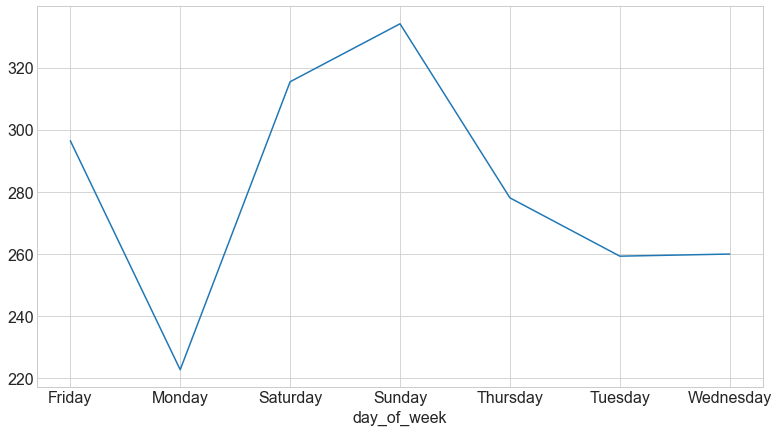

In [33]:
df.groupby('day_of_week').mean().sales_total.plot()

In [34]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


     

In [35]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

Exercise
Do your work for this exercise in a notebook named explore.ipynb. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

Note: When resampling data, use a mean() aggregation method.

Store Item Demand
Load your store item demand data using your acquire and/or prepare functions.

### Using a human-based approach, split your dataset into train and test sets.

In [36]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,25.16


In [37]:
print('Date Range:', df.index.min(), 'to', df.index.max())

Date Range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00


In [38]:
train = df[:'2016'] # includes 2016
test = df['2017'] 


### Visualize your train-test split.

<AxesSubplot:xlabel='sale_date'>

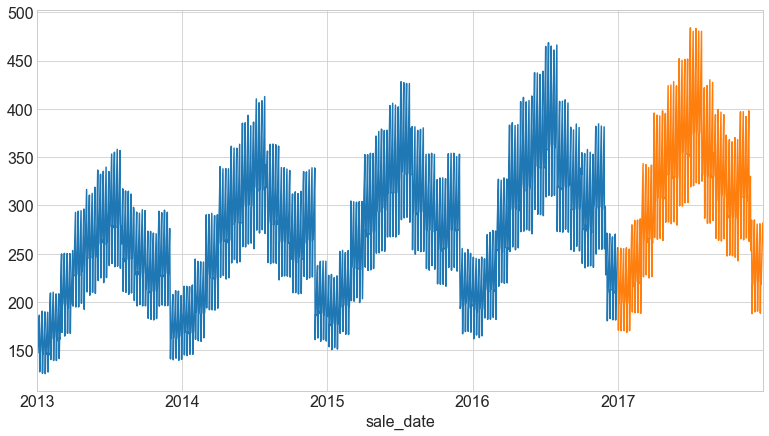

In [39]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

### Resample your data and visualize it.

In [40]:
# y is the resampled daily data:

y = train.resample('D').sales_total.mean()
y.head()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
Freq: D, Name: sales_total, dtype: float64

### Creating a rolling (moving) average of your data and visualize it.  We can calculate moving averages with the .rolling method.

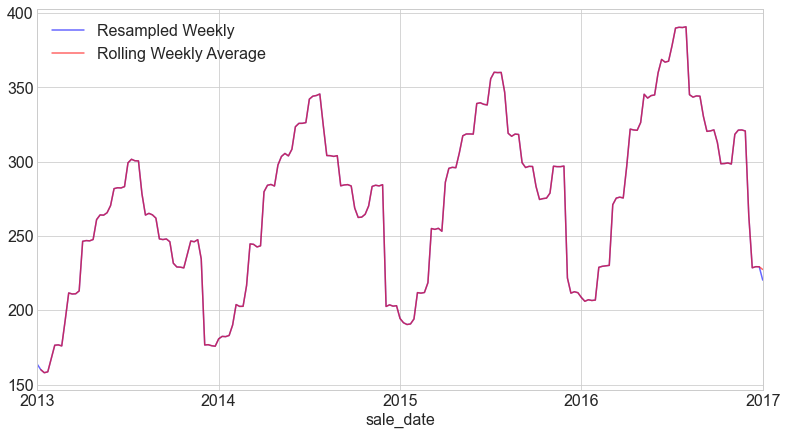

In [41]:
# Plot the weekly average & the 7-day moving average. Compare the 2 plots.

y.resample('W').mean().plot(label='Resampled Weekly', alpha=.6, color = 'blue')
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6, color = 'red')
plt.legend()

Text(0, 0.5, 'Difference in sales from one day to the next')

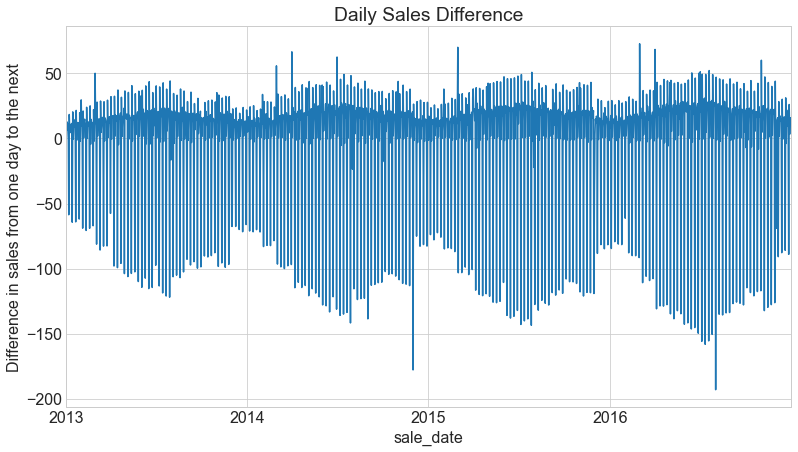

In [42]:
# Plot the daily difference. 
# Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

y.diff().plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference in sales from one day to the next')

Text(0, 0.5, '% Change')

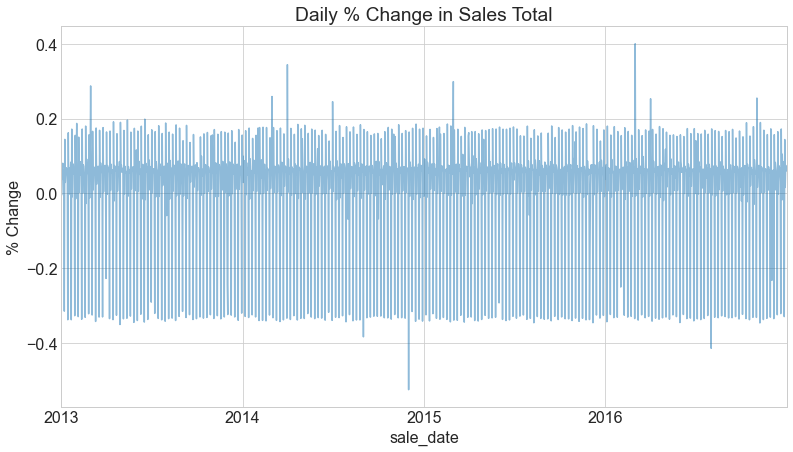

In [43]:
# Maybe it would be helpful to look at percent change as well:

(y.diff() / y.shift()).plot(alpha=.5)
plt.title('Daily % Change in Sales Total')
plt.ylabel('% Change')

[Text(0.5, 1.0, 'Monthly % Change in Sales Total')]

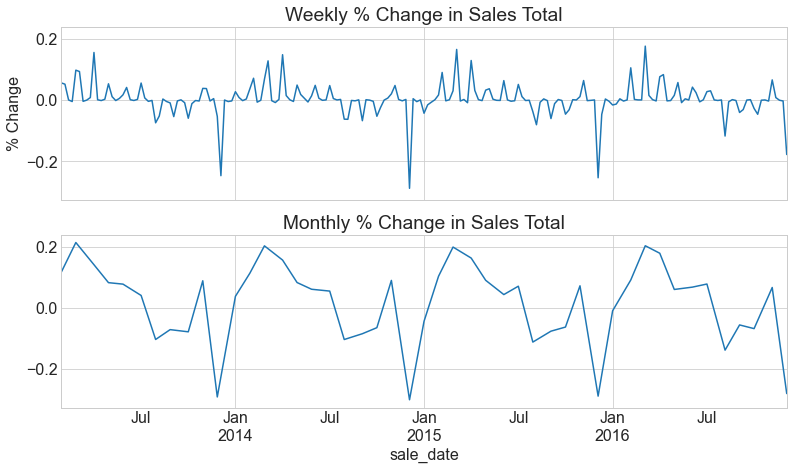

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
# ax2.hlines(0, *ax2.get_xlim())

In [45]:
y.resample('W').mean()

sale_date
2013-01-06    163.589167
2013-01-13    159.981203
2013-01-20    157.946720
2013-01-27    158.545383
2013-02-03    167.585014
                 ...    
2016-12-04    263.768997
2016-12-11    228.559894
2016-12-18    229.298643
2016-12-25    229.231000
2017-01-01    220.279177
Freq: W-SUN, Name: sales_total, Length: 209, dtype: float64

### Plot the difference in sales from one day to the next.

Visualizing Volatility
.diff let's us take the difference between the current and previous value

Text(0, 0.5, 'Difference in sales from one day to the next')

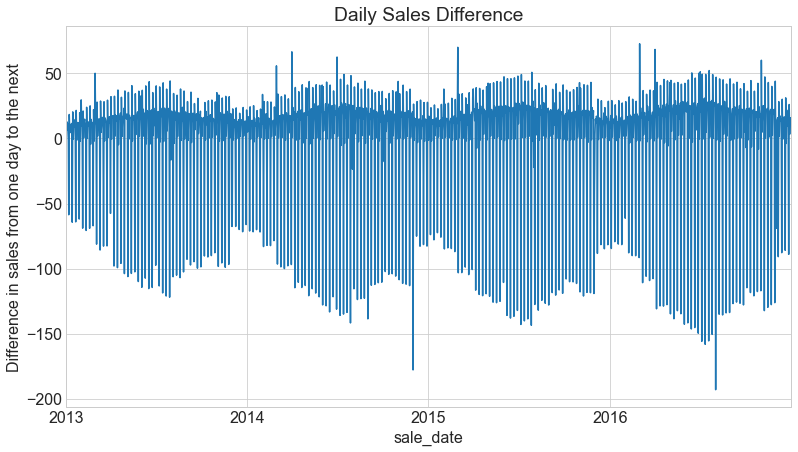

In [46]:
# Plot the daily difference. 
# Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

y.diff().plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference in sales from one day to the next')

### Plot the % difference in sales from one day to the next.

Text(0, 0.5, '% Change')

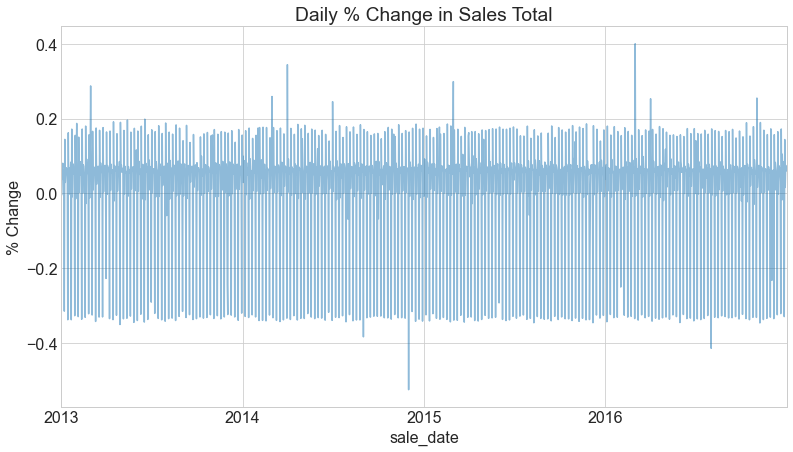

In [47]:
# Maybe it would be helpful to look at percent change as well:

(y.diff() / y.shift()).plot(alpha=.5)
plt.title('Daily % Change in Sales Total')
plt.ylabel('% Change')

### Plot the % difference in sales from one month to the next.

### Plot the % difference in sales from one week to the next.

[Text(0.5, 1.0, 'Monthly % Change in Sales Total')]

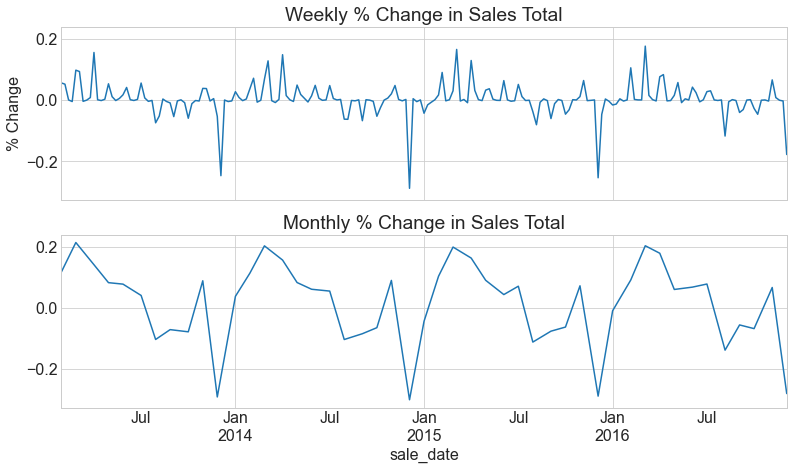

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
# ax2.hlines(0, *ax2.get_xlim())

### Visualize an autocorrelation plot on a weekly resampling.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

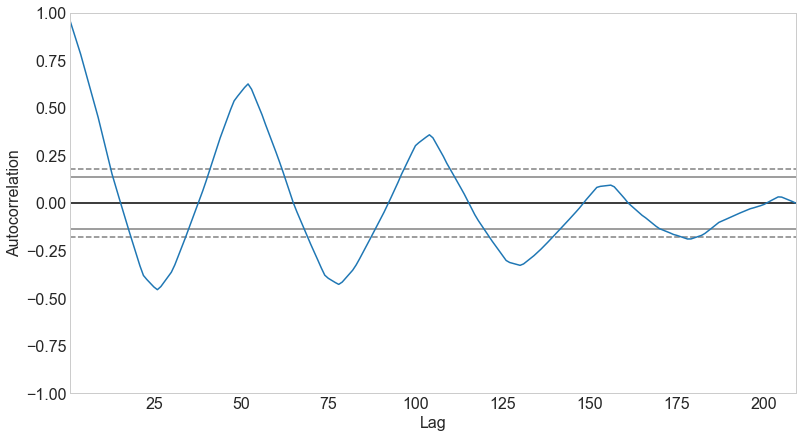

In [49]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

### Visualize a seasonal decomposition plot on a weekly resampling.

In [50]:
y = train.sales_total.resample('W').mean()
# we can access different attributes of object created above (e.g. seasonal, trend and resid(noise))

result = sm.tsa.seasonal_decompose(y)

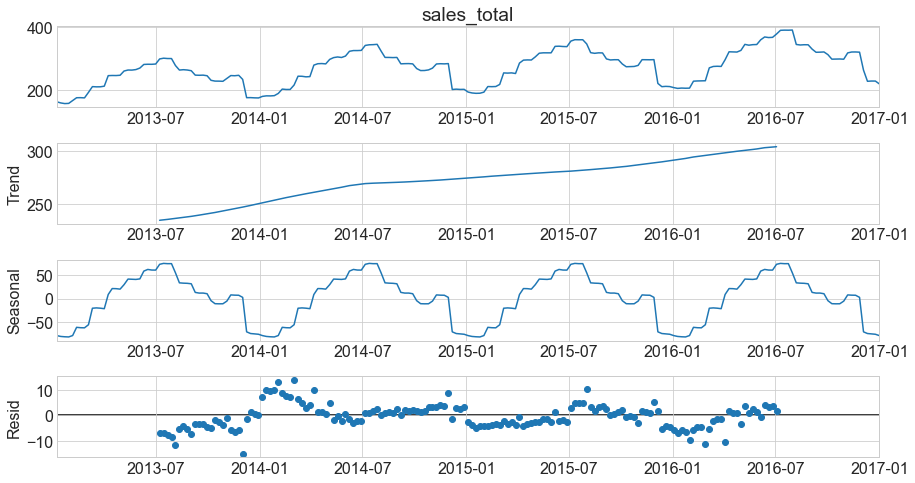

In [51]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('W').mean()).plot()
None

In [52]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.434789,NaN
2013-01-13,159.981203,NaN,-79.225757,NaN
2013-01-20,157.946720,NaN,-79.904284,NaN
2013-01-27,158.545383,NaN,-80.259357,NaN
2013-02-03,167.585014,NaN,-77.352692,NaN


Additive or multiplicative seasonality?
The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate.

https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/

Effectively, with multiplicative seasonality the width of the seasonal pattern is proportional to the level. For additive seasonality it is independent.

In [53]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from env import user, password, host
import os
from acquire import wrangle_store_data
import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

def get_opsd_data():
    if os.path.exists('opsd.csv'):
        return pd.read_csv('opsd.csv')
    df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
    df.to_csv('opsd.csv', index=False)
    return df




Using OPS data (hint: if you don't know how to acquire this data, do a bit of google searching on how to do this with pandas):

Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
Convert date column to datetime format.
Plot the distribution of each of your variables.
Set the index to be the datetime variable.
Add a month and a year column to your dataframe.
Fill any missing values.
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [54]:
df = get_opsd_data()

In [55]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


### Convert date column to datetime format. 

In [57]:
df.Date = pd.to_datetime(df.Date)

In [58]:
df.columns = [column.replace('+', '_').lower() for column in df]
df['wind_solar'] = df.wind + df.solar

### Plot the distribution of each of your variables. 

Column: date


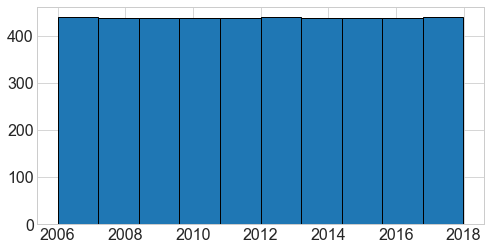

Column: consumption


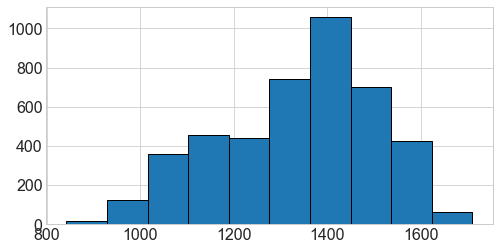

Column: wind


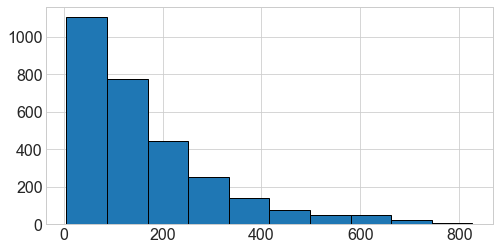

Column: solar


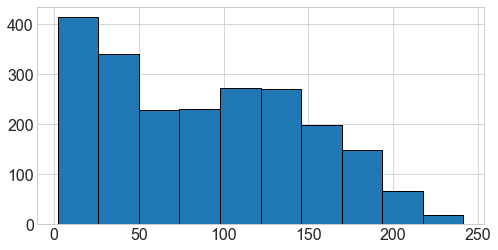

Column: wind_solar


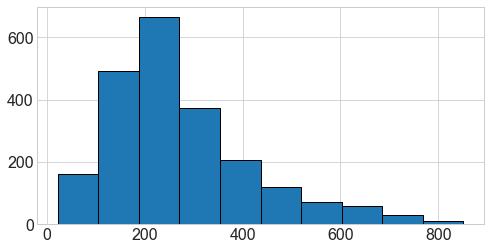

In [59]:
# Univariate analysis of variable distributions
for col in df.columns:        
    print('Column: ' + col)
    plt.figure(figsize=(8,4))
    plt.hist(df[col], edgecolor='black')
    plt.show()

### Set the index to be the datetime variable. 

In [60]:
df = df.set_index("date").sort_index()

In [61]:
df.head(1)

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN


### Add a month and a year column to your dataframe. 

In [62]:
df['month'] = df.index.month
df['year'] = df.index.year

In [63]:
df.head(1)

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006


### Fill any missing values. 

In [64]:
# fill in nulls or nan

df = df.fillna(0)

In [65]:
df.head(1)

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

OPS data
Load your OPS data using your acquire and/or prepare functions.

Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test.
Only use the train data set to perform the following tasks:

In [66]:
print('Date:', df.index.min(), 'to', df.index.max())

Date: 2006-01-01 00:00:00 to 2017-12-31 00:00:00


### Visualize your train-test split.

In [67]:
# split the data:
    
train = df[:'2013']
train.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


### Plot the consumption, wind, and solar data on the same chart.

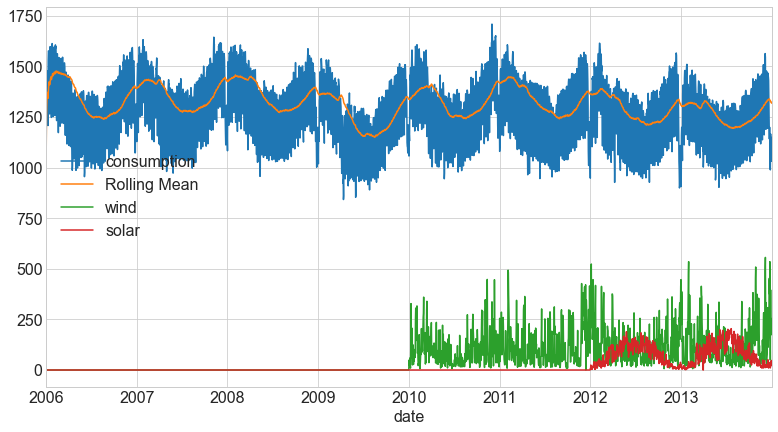

In [68]:
# plot the consumption, wind and solar data

train.consumption.plot(label="consumption")
plt.plot(train['consumption'].rolling('90D').mean(), label="Rolling Mean")
train.wind.plot()
train.solar.plot()
plt.legend()

### Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.

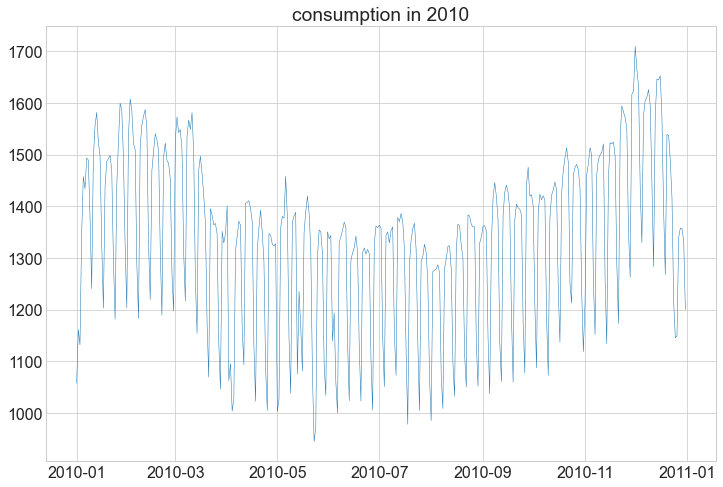

In [69]:
# lets look at consumption in a single year and see if we see any pattern
plt.figure(figsize=(12,8))
plt.plot(train.loc['2010-01':'2010-12']['consumption'], linewidth = 0.5)
plt.title("consumption in 2010")
plt.show()

There is a weekly pattern (i.e. within one week) and pattern within weeks of a month

### Resample the consumption data to monthly and plot it.

<AxesSubplot:xlabel='date'>

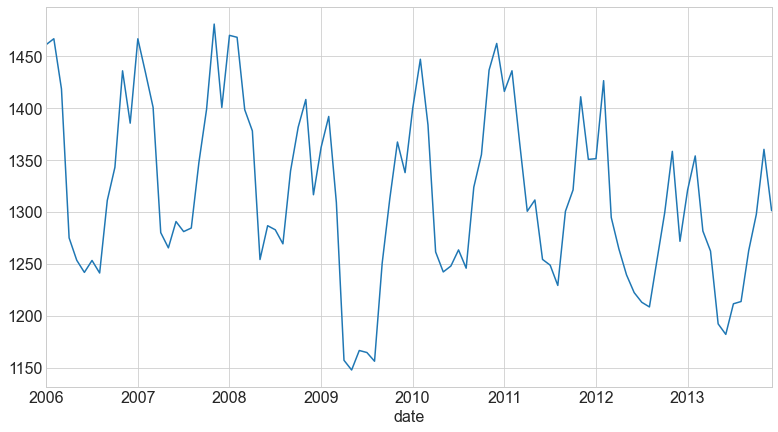

In [70]:
# resample monthly and plot

train.consumption.resample('M').mean().plot()

### Resample the consumption data to yearly and plot it.

(1100.0, 1400.0)

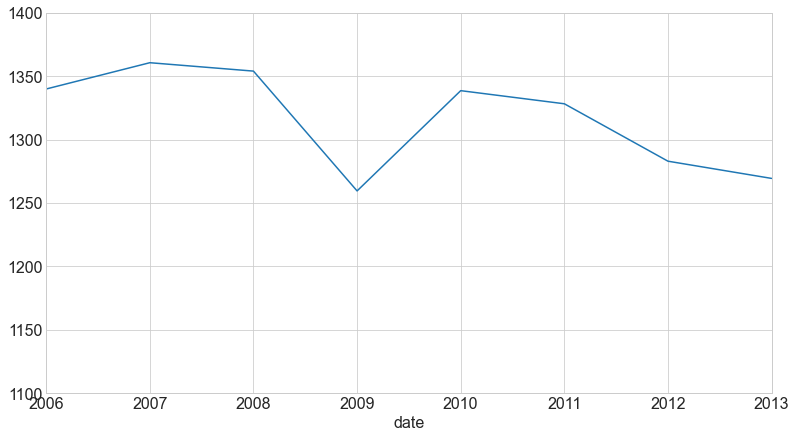

In [71]:
# resample data on yearly basis and plot
train.consumption.resample('Y').mean().plot()
plt.ylim(1100,1400)

In [72]:
# make a new datafrsame sources
sources = train[['consumption', 'wind', 'solar']]

# make a new column called conventional: Consumption - Wind - Solar
sources['conventional'] = sources.consumption - sources.wind - sources.solar

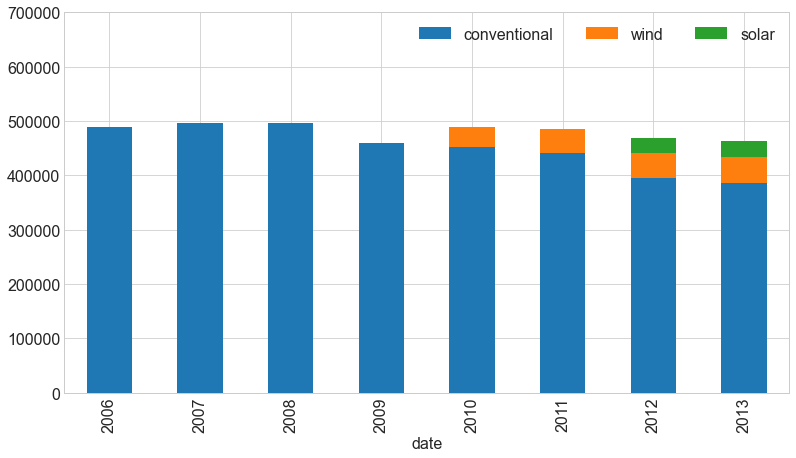

In [73]:
# lets plot the three power sources as stacked bar chart:

ax = sources[['conventional', 'wind', 'solar']].resample('Y').sum().plot.bar(stacked = True)
ax.set_ylim(0, 700000)
ax.legend(ncol = 3)

labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

<AxesSubplot:xlabel='date'>

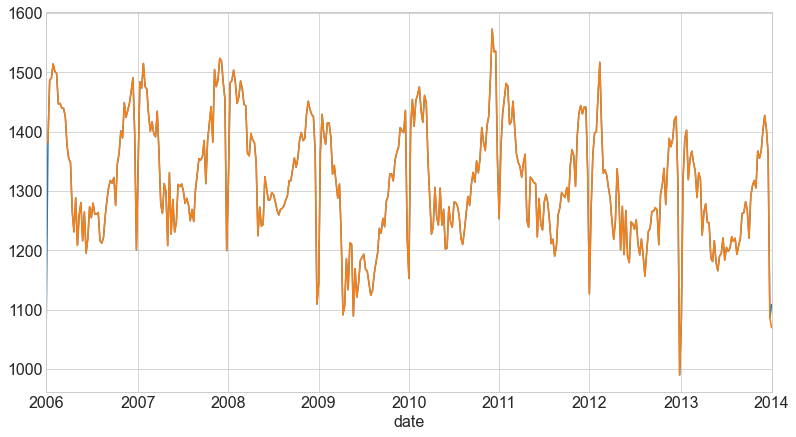

In [74]:
train.consumption.resample('W').mean().plot()
train.consumption.rolling(7).mean().plot()

#### Group the electricity consumption time series by month of year, to explore annual seasonality.

In [75]:
train['month'] = train.index.month
train['weekday'] = train.index.day_name()

<AxesSubplot:xlabel='month', ylabel='consumption'>

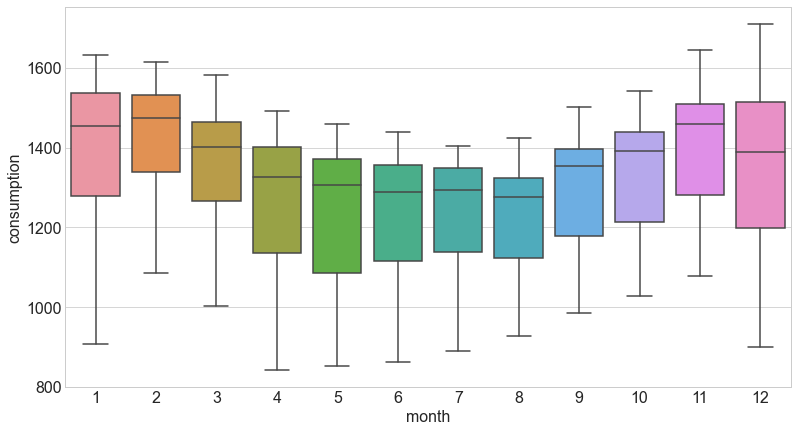

In [76]:
# Energy consumption by month
sns.boxplot(data = train, x = 'month', y = 'consumption')
#Consumption drops in summer months

<AxesSubplot:xlabel='weekday', ylabel='consumption'>

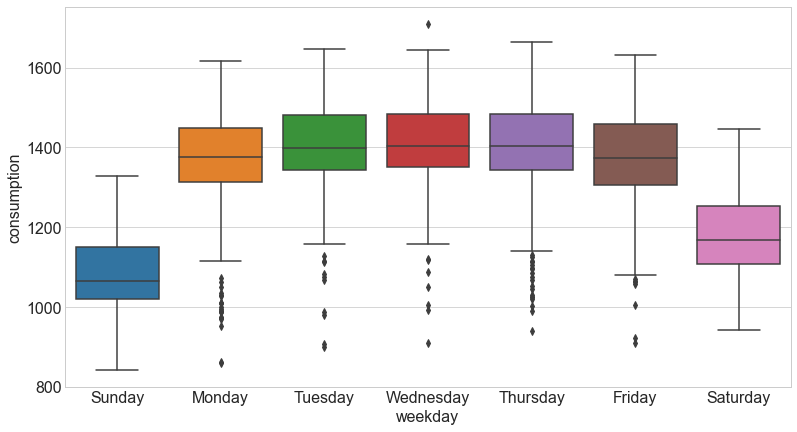

In [77]:
# Energy consumption by weekday
sns.boxplot(data = train, x = 'weekday', y = 'consumption')
#Seems like consumption drops on weekend

#### Subseasonal Plot

In [78]:
y = train.consumption
table = y.groupby([y.index.strftime('%Y'), y.index.strftime('%m-%b')]).mean().unstack()

table.head()

date,01-Jan,02-Feb,03-Mar,04-Apr,05-May,06-Jun,07-Jul,08-Aug,09-Sep,10-Oct,11-Nov,12-Dec
date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581


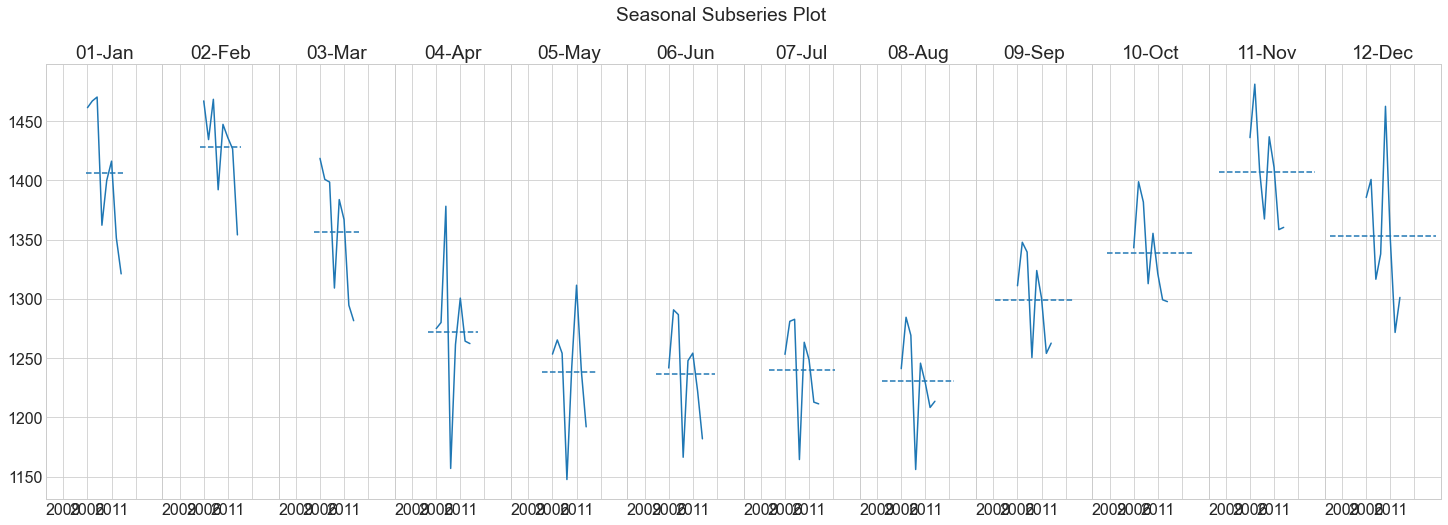

In [79]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(25,8))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

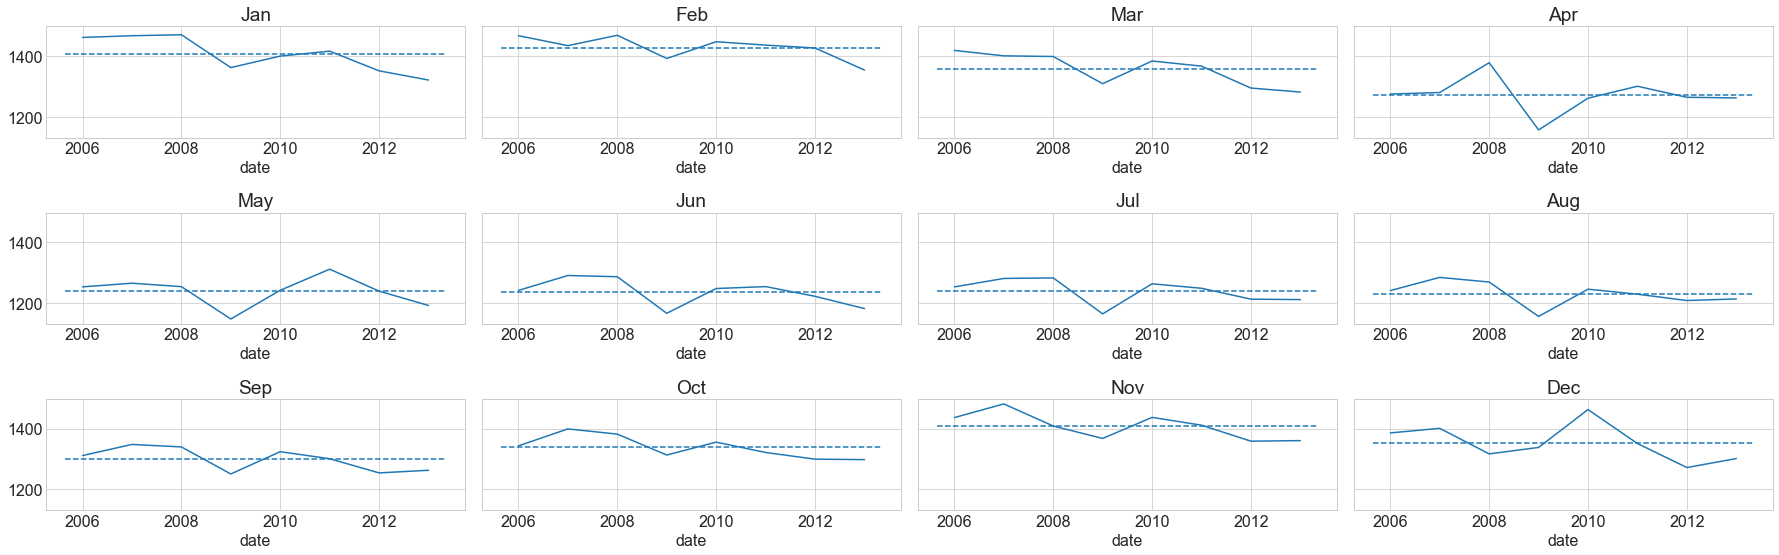

In [80]:
fig, axs = plt.subplots(3, 4, sharex=False, sharey=True, figsize=(25,8))

for ax, (month, subset) in zip(axs.ravel(), table.iteritems()):
    subset.plot(ax=ax, title=month[3:])
    ax.hlines(subset.mean(), *ax.get_xlim(), ls = '--')
fig.subplots_adjust(wspace=0)
plt.tight_layout()

[Text(0.5, 1.0, 'Wind production pattern')]

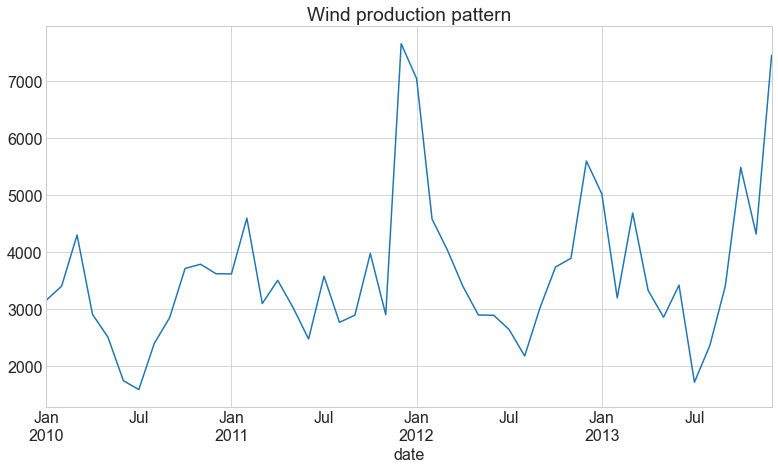

In [81]:
# How does the wind production/consumption vary within a year and also year to year?

ax = train['2010':].wind.resample('M').sum().plot()
ax.set(title = 'Wind production pattern')

Wind production drops in summer months

[Text(0.5, 1.0, 'Solar production pattern')]

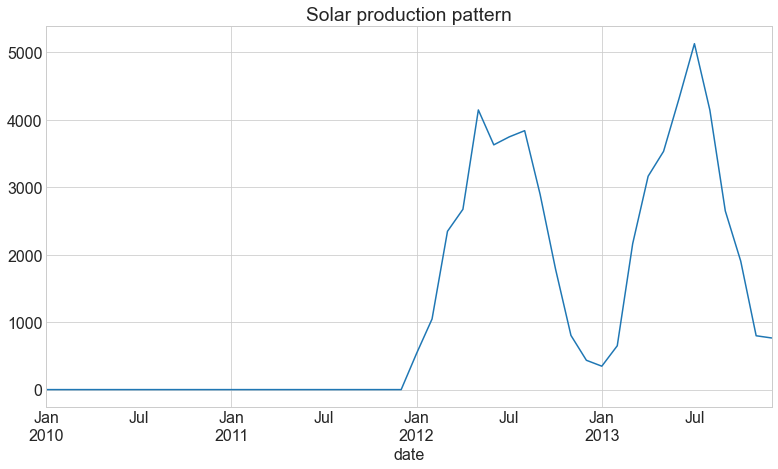

In [82]:
# How does the solar production/consumption vary within a year and also year to year?


ax = train['2010':].solar.resample('M').sum().plot()
ax.set(title = 'Solar production pattern')

Solar production peaks in summer

In [83]:
# bring in the GDP growth rate data

growth_rate = {2006:3.815, 2007:2.984, 2008:0.962, 2009:-5.697, 2010:4.179, 2011:3.924, 2012:0.42, 2013:0.428, 2014:2.226 , 2015:1.74 , 2016:2.23 , 2017:2.465 }

In [84]:
# convert dict to dataframe
growth_rate = pd.DataFrame.from_dict(growth_rate, orient='index', columns = ['growth_rate'])
growth_rate.head()

,growth_rate
2006,3.815
2007,2.984
2008,0.962
2009,-5.697
2010,4.179


In [85]:
# set index as datetimeindex
growth_rate.index = pd.to_datetime(growth_rate.index, format = '%Y' )

In [86]:
# check the dataframe hear
growth_rate.head()

,growth_rate
2006-01-01,3.815
2007-01-01,2.984
2008-01-01,0.962
2009-01-01,-5.697
2010-01-01,4.179


Text(0, 0.5, 'Growth Rate')

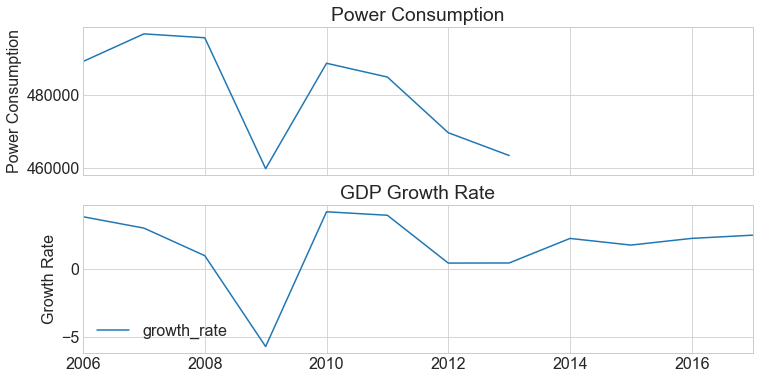

In [88]:
# compare power consumption and GDP growth rate:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 9))

ax = train.consumption.resample('Y').sum().plot(figsize = (12,6), ax = ax1)
ax1.set(title='Power Consumption')
ax1.set_ylabel('Power Consumption')

growth_rate.plot(ax =ax2)
ax2.set(title='GDP Growth Rate')
ax2.set_ylabel('Growth Rate')

#### Plot a time series decomposition. Takeaways?

In [89]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').consumption.mean(), model='additive')

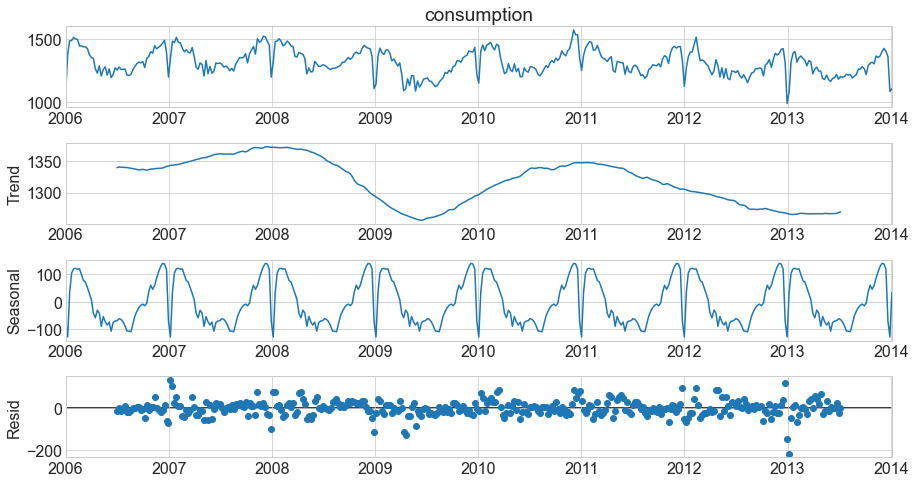

In [90]:
decomposition.plot()
None

## BONUS

### Group the consumption data by month and create a boxplot treating the month component as a separate categorical feature.

In [91]:
y.groupby([y.index.month]).mean()

date
1     1406.262202
2     1428.485633
3     1356.838657
4     1272.433300
5     1238.263702
6     1236.551471
7     1239.813202
8     1231.047016
9     1298.845092
10    1338.826234
11    1407.543962
12    1353.447411
Name: consumption, dtype: float64

<AxesSubplot:xlabel='month', ylabel='consumption'>

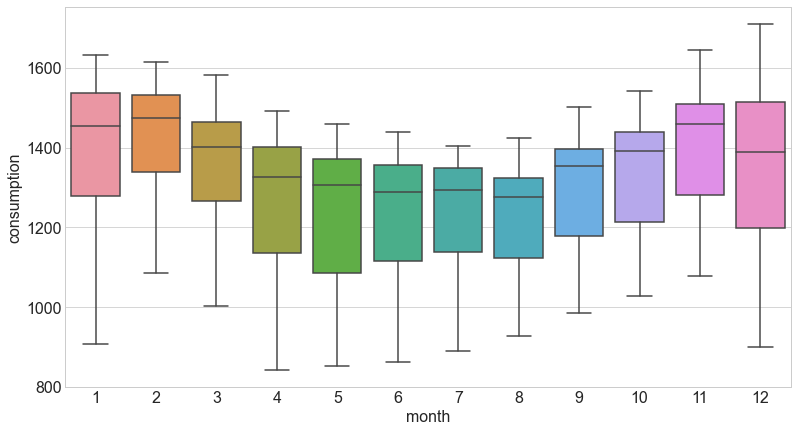

In [93]:
sns.boxplot(x = 'month', y = 'consumption', data=train) 

### Group the consumption data by weekday and create a boxplot treating the weekday component as a separate categorical feature.

In [ ]:
y.groupby([y.index.weekday]).mean()

<AxesSubplot:xlabel='weekday', ylabel='consumption'>

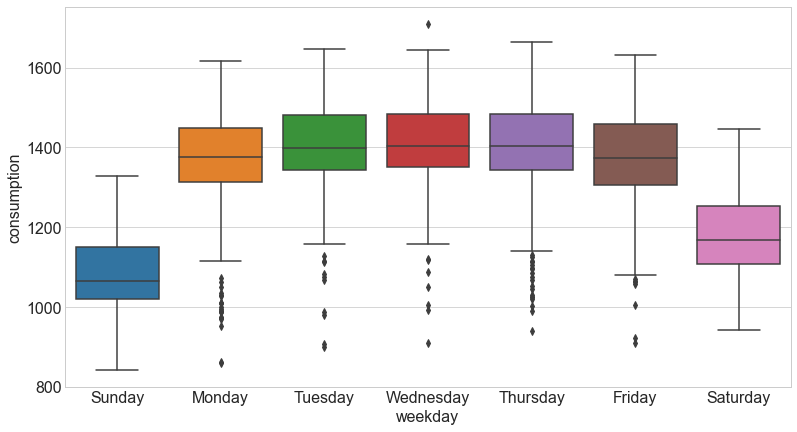

In [94]:
sns.boxplot(x = 'weekday', y = 'consumption', data=train) 

### Create a subseasonal plot by month of your consumption data.

In [95]:
# Start off by getting average temperate for each year-month combination:
y.groupby([y.index.year, y.index.month]).mean()

date  date
2006  1       1461.442065
      2       1467.106893
      3       1418.649161
      4       1275.058900
      5       1253.488484
                 ...     
2013  8       1213.691355
      9       1262.723900
      10      1297.771387
      11      1360.433367
      12      1301.299645
Name: consumption, Length: 96, dtype: float64

In [96]:
# unstack is similar to pivot_table and be used to break up multi-level indices. 
# In this case, we turn the 0 index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

date,2006,2007,2008,2009,2010,2011,2012,2013
date,,,,,,,,
1,1461.442065,1467.058032,1470.373484,1362.255613,1400.041677,1416.290581,1351.441226,1321.194935
2,1467.106893,1434.484357,1468.486207,1392.155179,1447.322536,1436.212607,1426.666241,1354.087429
3,1418.649161,1400.909871,1398.653258,1309.222387,1383.865226,1366.989516,1294.748258,1281.671581
4,1275.058900,1280.133167,1378.243233,1157.006367,1261.505467,1300.732300,1264.427000,1262.359967
5,1253.488484,1265.436000,1254.194226,1147.650742,1242.220129,1311.608290,1239.388710,1192.123032
6,1241.781667,1290.828733,1286.797100,1166.456833,1247.938433,1254.294333,1222.315667,1181.999000
7,1253.296290,1281.134258,1282.866355,1164.515871,1263.467452,1248.768194,1212.953710,1211.503484
8,1241.188774,1284.554355,1269.323484,1156.114645,1245.832323,1229.204935,1208.466258,1213.691355
9,1311.169933,1347.857500,1339.615433,1250.585967,1324.003533,1300.706833,1254.097633,1262.723900


<AxesSubplot:xlabel='date'>

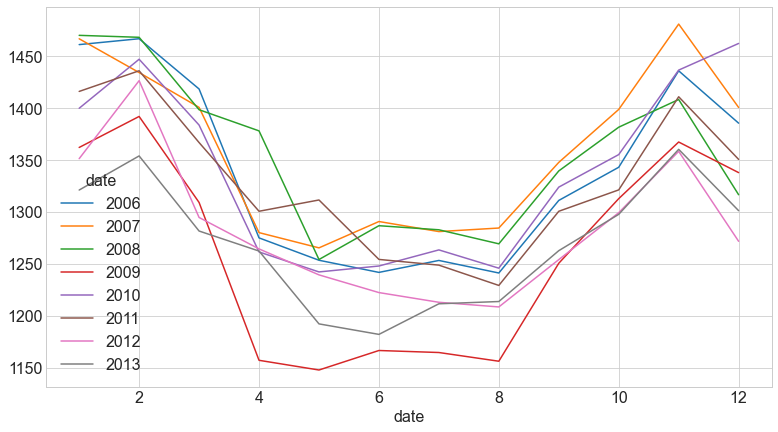

In [97]:
# Run .plot on this object
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

In [98]:
# This is actually the same pivot table as above, but months are on the top and years are on the left
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645


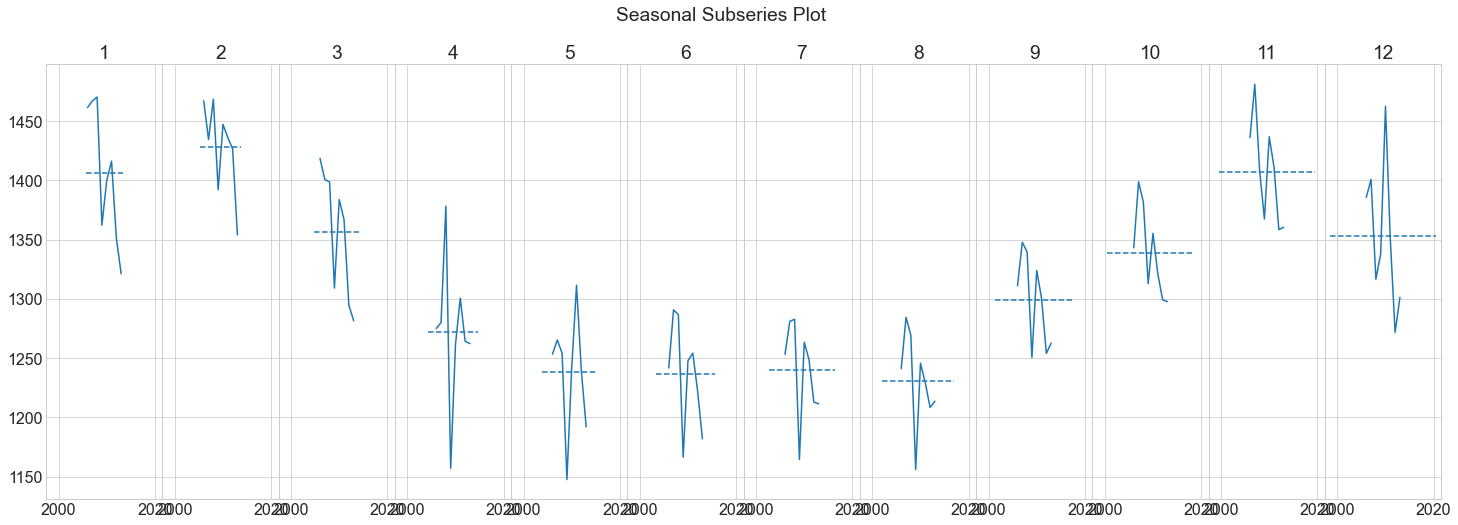

In [99]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(25,8))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

### Create one or two visualizations that helps answer the follow questions: How does wind production/consumption vary within a year? How does wind production/consumption vary from year to year?

[Text(0.5, 1.0, 'Wind production pattern')]

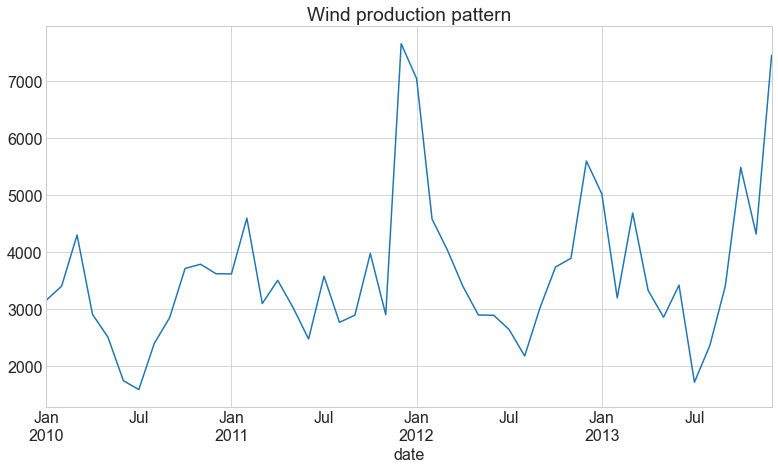

In [100]:
# How does the wind production/consumption vary within a year and also year to year?

ax = train['2010':].wind.resample('M').sum().plot()
ax.set(title = 'Wind production pattern')

### Create one or two visualizations that helps answer the follow questions: How does solar production/consumption vary within a year? How does solar production/consumption vary from year to year?

[Text(0.5, 1.0, 'Solar production pattern')]

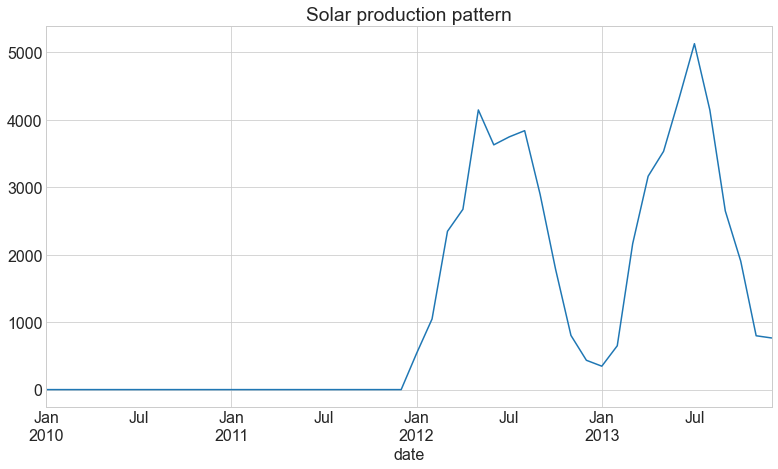

In [101]:
# How does the solar production/consumption vary within a year and also year to year?


ax = train['2010':].solar.resample('M').sum().plot()
ax.set(title = 'Solar production pattern')

### Plot a time series decomposition for your consumption data and note your takeaways.

In [102]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').consumption.mean(), model='additive')

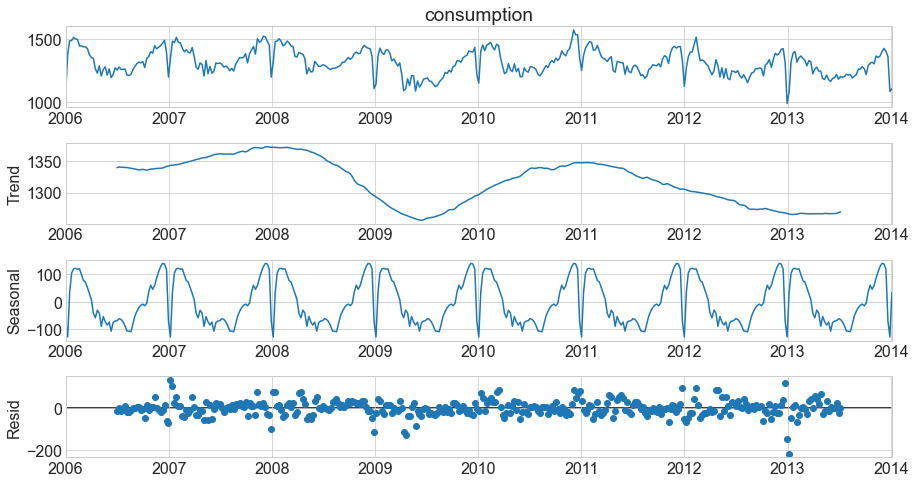

In [103]:
decomposition.plot()
None

In [104]:
There is a annual seasonality. The energy consumption drops during December

SyntaxError: invalid syntax (426883622.py, line 1)

### Create an autocorrelation plot of a weekly resampling of the consumption data.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

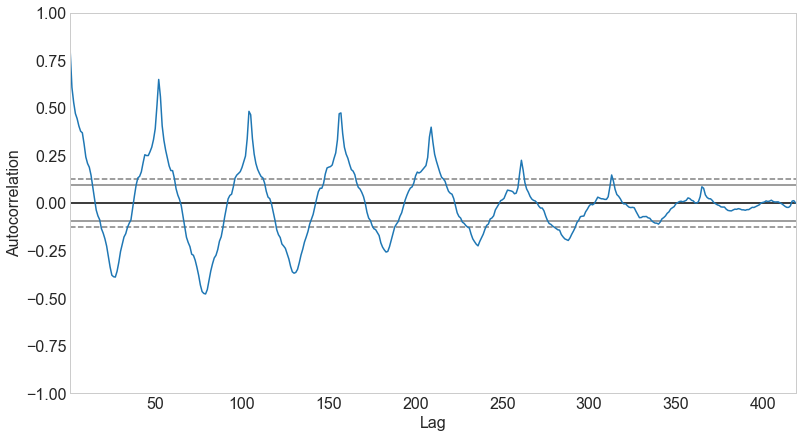

In [105]:
# autocorrelation plot 
pd.plotting.autocorrelation_plot(train.consumption.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

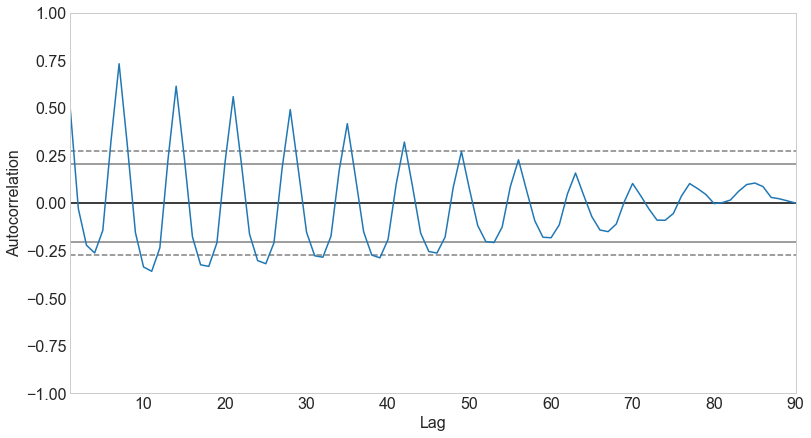

In [106]:
# Is there a weekly seasonality in this data?
pd.plotting.autocorrelation_plot(train.consumption['2010-01': '2010-03'])